# SYDE 522 Final Project: Predicting Heart Failure Risk Based on Clinical Indicators

Elizabeth Janes, Akanksha Joshi, Kendra Wang

# Pre-processing

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.preprocessing import minmax_scaling

## **Load dataset**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

raw_data = pd.read_csv(url, sep=",")
raw_data.columns = ["age","sex","cp","testbps","chol","fbs","restecg","thalach",
                   "exang","oldpeak","slope","ca","thal","hd"]                
raw_data

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
300,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


## **Delete invalid data**

In [ ]:
rows_to_drop = raw_data[raw_data.isin(['?']).any(axis=1)]
rows_to_drop

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
86,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
165,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
191,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
265,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
286,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
301,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
indices_to_drop = list(rows_to_drop.index.values)  
dataset = raw_data.drop(labels=indices_to_drop)
dataset

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


## **Convert ca and thal columns to numeric types**

In [ ]:
dataset[["ca", "thal"]] = dataset[["ca", "thal"]].apply(pd.to_numeric)

dataset.dtypes

age        float64
sex        float64
cp         float64
testbps    float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca         float64
thal       float64
hd           int64
dtype: object

## **Make hd (Heart Disease) column binary**
<br> 0 = heart disease absent
<br> 1, 2, 3, 4 = heart disease present

In [ ]:
dataset.loc[dataset['hd'] > 0, 'hd'] = 1
dataset

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
297,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
298,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,1
299,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,1


## **Normalize data using min-max scaling** 
<br> Function from http://rasbt.github.io/mlxtend/user_guide/preprocessing/minmax_scaling/

In [ ]:
temp = minmax_scaling(dataset, columns=['testbps', 'chol', 'thalach', 'oldpeak'])
dataset['testbps'] = temp['testbps']
dataset['chol'] = temp['chol']
dataset['thalach'] = temp['thalach']
dataset['oldpeak'] = temp['oldpeak']
dataset

,age,sex,cp,testbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,67.0,1.0,4.0,0.622642,0.365297,0.0,2.0,0.282443,1.0,0.241935,2.0,3.0,3.0,1
1,67.0,1.0,4.0,0.245283,0.235160,0.0,2.0,0.442748,1.0,0.419355,2.0,2.0,7.0,1
2,37.0,1.0,3.0,0.339623,0.283105,0.0,0.0,0.885496,0.0,0.564516,3.0,0.0,3.0,0
3,41.0,0.0,2.0,0.339623,0.178082,0.0,2.0,0.770992,0.0,0.225806,1.0,0.0,3.0,0
4,56.0,1.0,2.0,0.245283,0.251142,0.0,0.0,0.816794,0.0,0.129032,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,57.0,0.0,4.0,0.433962,0.262557,0.0,0.0,0.396947,1.0,0.032258,2.0,0.0,7.0,1
297,45.0,1.0,1.0,0.150943,0.315068,0.0,0.0,0.465649,0.0,0.193548,2.0,0.0,7.0,1
298,68.0,1.0,4.0,0.471698,0.152968,1.0,0.0,0.534351,0.0,0.548387,2.0,2.0,7.0,1
299,57.0,1.0,4.0,0.339623,0.011416,0.0,0.0,0.335878,1.0,0.193548,2.0,1.0,7.0,1


## Split the data into train and test sets
The paper we are using (insert citation), which presents an implementation in R, uses 70% of the data for training, with the remaining 30% being used for testing. We will do the same. 

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:,0:13].values
Y = dataset['hd'].values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=0)

# Checking class distribution in dataset split
print(pd.Series(Y_train).value_counts()/len(pd.Series(Y_train))*100)
print(pd.Series(Y_test).value_counts()/len(pd.Series(Y_test))*100)

0    54.10628
1    45.89372
dtype: float64
0    52.808989
1    47.191011
dtype: float64


# Compute Statistics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix as sklearn_confusion_matrix, classification_report, f1_score, roc_auc_score

# A function that computes and prints the relevant statistical metrics used in the paper
def compute_metrics(test_predictions, train_predictions):
  # Confusion Matrix
  matrix = sklearn_confusion_matrix(Y_test, test_predictions)
  print(f'Confusion matrix: ')
  print(matrix)
  tn, fp, fn, tp = matrix.ravel()

  # Accuracy
  test_accuracy = accuracy_score(Y_test, test_predictions)
  print(f'Test accuracy: {test_accuracy}')
  train_accuracy = accuracy_score(Y_train, train_predictions)
  print(f'Train accuracy: {train_accuracy}')

  # Test Sensitivity
  sensitivity = tp/(tp+fn)
  print(f'Sensitivity: {sensitivity}')

  # Test Specificity
  specificity = tn/(fp+tn)
  print(f'Specificity: {specificity}')

  # F1 Score
  f1 = f1_score(Y_test, test_predictions)
  print(f'F1 Score: {f1}')

  return [test_accuracy, sensitivity, f1]


# K-Nearest Neighbours

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

In [ ]:
# The paper that provides the code in R uses a K value of 10, so let's start with that.
# We will perform hyperparameter tuning afterwards.

# Create a new classifier with n_neighbors set to 10
clf = KNeighborsClassifier(n_neighbors=10)
# Fit the classifier on the train set
clf.fit(X_train, Y_train)
# Use the trained classifier to predict heart disease in the test set
Y_pred = clf.predict(X_test)

# Calculate the accuracy score
acc_score = accuracy_score(Y_test, Y_pred)
print("Accuracy Score: ", acc_score)

compute_metrics(Y_pred, clf.predict(X_train))

# Compute AUC
Y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, Y_pred_proba)
print("AUC: ", auc)

Accuracy Score:  0.8202247191011236
Confusion matrix: 
[[42  5]
 [11 31]]
Test accuracy: 0.8202247191011236
Train accuracy: 0.7874396135265701
Sensitivity: 0.7380952380952381
Specificity: 0.8936170212765957
F1 Score: 0.7948717948717949
AUC:  0.8786727456940224


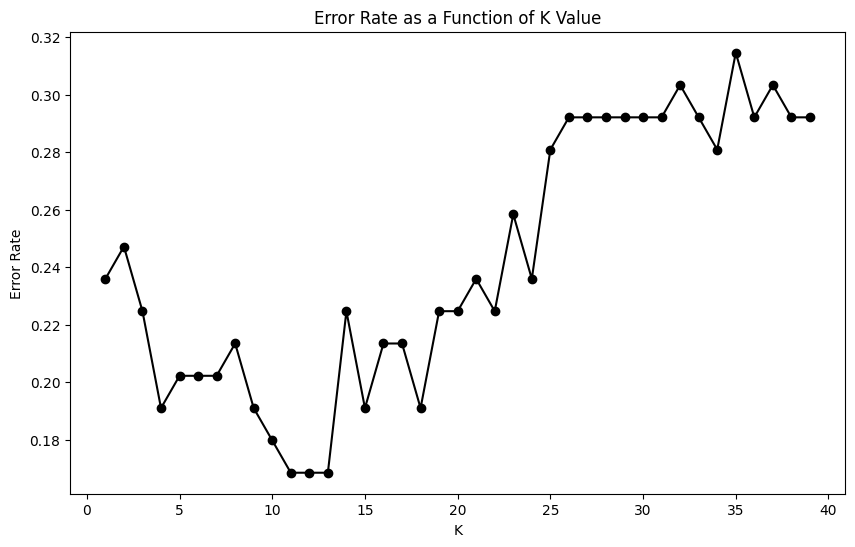

In [ ]:
# Hyperparemeter tuning: Let's find the best K value for our KNN algorithm using the elbow method.
# Source: https://medium.com/@moussadoumbia_90919/elbow-method-in-supervised-learning-optimal-k-value-99d425f229e7
error_rate = []

# Loop through Ks from 1-40
for i in range(1, 40):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, Y_train)
  prediction = knn.predict(X_test)
  error_rate.append(np.mean(prediction != Y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='black', marker='o')
plt.title("Error Rate as a Function of K Value")
plt.xlabel("K")
plt.ylabel("Error Rate")
plt.show()

The error rate appears to increase after a K value of 13 from the graph above. There is a plateu where the minimum error rate is seen with K values of 11, 12, and 13 so we will use a K value of 11 in our algorithm.

In [ ]:
# Create a new classifier with n_neighbors set to 11
clf = KNeighborsClassifier(n_neighbors=11)
# Fit the classifier on the train set
clf.fit(X_train, Y_train)
# Use the trained classifier to predict heart disease in the test set
Y_pred = clf.predict(X_test)

# Calculate the accuracy score
acc_score = accuracy_score(Y_test, Y_pred)
print("Accuracy Score: ", acc_score)

compute_metrics(Y_pred, clf.predict(X_train))

# Compute AUC
Y_pred_proba = clf.predict_proba(X_test)[:, 1]
auc = roc_auc_score(Y_test, Y_pred_proba)
print("AUC: ", auc)

Accuracy Score:  0.8314606741573034
Confusion matrix: 
[[40  7]
 [ 8 34]]
Test accuracy: 0.8314606741573034
Train accuracy: 0.782608695652174
Sensitivity: 0.8095238095238095
Specificity: 0.851063829787234
F1 Score: 0.8192771084337348
AUC:  0.8748733535967579


# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score
import numpy as np
from statistics import mean

# Scale training data
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)

# Create logistic regression model and fit to training data                            
clf = LogisticRegression().fit(X_train_sc, Y_train)

# Scale test data
scaler = StandardScaler().fit(X_test)
X_test_sc = scaler.transform(X_test)

# Predict heart disease using trained model + training data
Y_train_pred = clf.predict(X_train_sc)

# Predict heart disease using trained model + test data
Y_test_pred = clf.predict(X_test_sc)

test_accuracy, sensitivity, f1 = compute_metrics(Y_test_pred, Y_train_pred)

# calculate AUC of model
auc = roc_auc_score(Y_test, clf.decision_function(X_test_sc))
print(f'AUC ROC: {auc}')

# Mean
total_mean = mean([test_accuracy, sensitivity, f1, auc])
print((f'Mean: {total_mean}'))


Confusion matrix: 
[[42  5]
 [ 8 34]]
Test accuracy: 0.8539325842696629
Train accuracy: 0.8743961352657005
Sensitivity: 0.8095238095238095
Specificity: 0.8936170212765957
F1 Score: 0.8395061728395062
AUC ROC: 0.9022289766970618
Mean: 0.8512978858325101


Plot feature importance summary

Feature: age, Score: -0.10014
Feature: sex, Score: 0.62071
Feature: cp, Score: 0.81196
Feature: testbps, Score: 0.52578
Feature: chol, Score: 0.25209
Feature: fbs, Score: -0.10768
Feature: restecg, Score: 0.26242
Feature: thalach, Score: -0.62339
Feature: exang, Score: 0.23712
Feature: oldpeak, Score: 0.30468
Feature: slope, Score: 0.13209
Feature: ca, Score: 1.29965
Feature: thal, Score: 0.45969


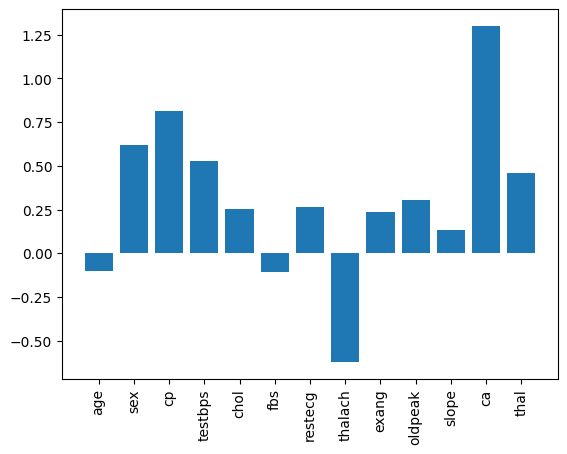

In [ ]:
from matplotlib import pyplot

# get importance
importance = clf.coef_[0]
feature_names = dataset.columns.values[0:13]
# summarize feature importance
for i,v in enumerate(importance):
  print(f'Feature: {feature_names[i]}, Score: %.5f' % (v))
# plot feature importance
pyplot.bar([x for x in feature_names], importance)
pyplot.xticks(rotation='vertical')
pyplot.show()

Logistic Regression with hyperparameter tuning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Scale training data
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)

# Scale test data
scaler = StandardScaler().fit(X_test)
X_test_sc = scaler.transform(X_test)

# define models and parameters
logistic_Reg = LogisticRegression(random_state=0)
solvers = ['newton-cg', 'liblinear','lbfgs', 'newton-cholesky', 'sag', 'saga']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# setup grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
grid_search = GridSearchCV(estimator=logistic_Reg, param_grid=grid, scoring='accuracy')
grid_result = grid_search.fit(X_train_sc, Y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
#for mean, stdev, param in zip(means, stds, params):
    #print("%f (%f) with: %r" % (mean, stdev, param))
print();

Y_train_pred = grid_result.predict(X_train_sc)

Y_test_pred = grid_result.predict(X_test_sc)

test_accuracy, sensitivity, f1 = compute_metrics(Y_test_pred, Y_train_pred)

#calculate AUC of model
auc = roc_auc_score(Y_test, clf.decision_function(X_test_sc))
print(f'AUC ROC: {auc}')

# Mean
total_mean = mean([test_accuracy, sensitivity, f1, auc])
print((f'Mean: {total_mean}'))


Best: 0.826481 using {'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}

Confusion matrix: 
[[44  3]
 [ 9 33]]
Test accuracy: 0.8651685393258427
Train accuracy: 0.8502415458937198
Sensitivity: 0.7857142857142857
Specificity: 0.9361702127659575
F1 Score: 0.8461538461538461
AUC ROC: 0.9022289766970618
Mean: 0.8498164119727591


Print confusion matrix

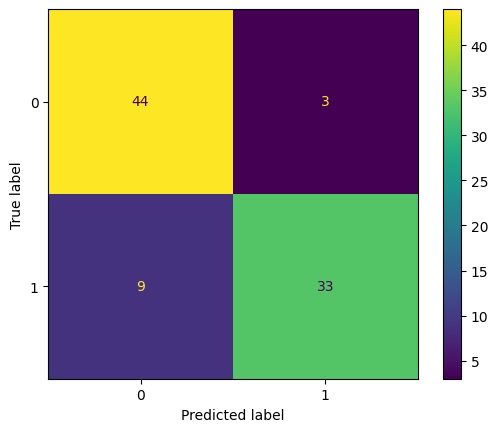

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(Y_test, Y_test_pred, labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

# Support Vector Machine

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from scipy.stats import mode
from itertools import combinations
from sklearn.model_selection import GridSearchCV

# Using default R SVM parameters based on paper's code
clf = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr')
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)

compute_metrics(predictions, clf.predict(X_train))

# AUC
auc = roc_auc_score(Y_test, clf.decision_function(X_test))
print(f'AUC ROC: {auc}')

# Use grid search to tune hyperparameters
clf_tuning = SVC(C=..., kernel='rbf', gamma=..., decision_function_shape=..., class_weight=...)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(estimator=clf_tuning, param_grid=param_grid, refit=True, verbose=0)

grid.fit(X_train, Y_train)

print('Best Train Params')
print(grid.best_params_)

grid_predictions = grid.predict(X_test)

print('Best Test Params')
print(grid.best_params_)

print('Train Classification Report')
print(classification_report(Y_train, grid.predict(X_train)))
print('Test Classification Report')
print(classification_report(Y_test, grid_predictions))

compute_metrics(grid_predictions, grid.predict(X_train))

# AUC
auc = roc_auc_score(Y_test, clf.decision_function(X_test))
print(f'AUC ROC: {auc}')

Confusion matrix: 
[[40  7]
 [ 7 35]]
Test accuracy: 0.8426966292134831
Train accuracy: 0.893719806763285
Sensitivity: 0.8333333333333334
Specificity: 0.851063829787234
F1 Score: 0.8333333333333334
AUC ROC: 0.9093211752786221
Best Train Params
{'C': 100, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 'scale'}
Best Test Params
{'C': 100, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 'scale'}
Train Classification Report
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       112
           1       0.85      0.79      0.82        95

    accuracy                           0.84       207
   macro avg       0.84      0.84      0.84       207
weighted avg       0.84      0.84      0.84       207

Test Classification Report
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        47
           1       0.87      0.81      0.84        42

    accuracy           

# SVM with Subset of Features

In [ ]:
import numpy as np
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from scipy.stats import mode
from itertools import combinations
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

X_subset = dataset[['sex', 'fbs', 'restecg', 'thalach', 'exang', 'ca']].values
Y_subset = dataset['hd'].values

X_train_subset, X_test_subset, Y_train_subset, Y_test_subset = train_test_split(X_subset, Y_subset, test_size=0.30, random_state=0)

# Using default R SVM parameters based on paper's code
clf = SVC(kernel='rbf', gamma='auto', decision_function_shape='ovr')
clf.fit(X_train_subset, Y_train_subset)
predictions = clf.predict(X_test_subset)

compute_metrics(predictions, clf.predict(X_train_subset))

# AUC
auc = roc_auc_score(Y_test_subset, clf.decision_function(X_test_subset))
print(f'AUC ROC: {auc}')

# Use grid search to tune hyperparameters
clf_tuning = SVC(C=..., kernel='rbf', gamma=..., decision_function_shape=..., class_weight=...)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 
    'gamma': ['scale', 'auto'],
    'decision_function_shape': ['ovo', 'ovr'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(estimator=clf_tuning, param_grid=param_grid, refit=True, verbose=0)

grid.fit(X_train_subset, Y_train_subset)

print('Best Train Params')
print(grid.best_params_)

grid_predictions = grid.predict(X_test_subset)

print('Best Test Params')
print(grid.best_params_)

print('Train Classification Report')
print(classification_report(Y_train_subset, grid.predict(X_train_subset)))
print('Test Classification Report')
print(classification_report(Y_test_subset, grid_predictions))

compute_metrics(grid_predictions, grid.predict(X_train_subset))

# AUC
auc = roc_auc_score(Y_test_subset, clf.decision_function(X_test_subset))
print(f'AUC ROC: {auc}')

Confusion matrix: 
[[44  3]
 [14 28]]
Test accuracy: 0.8089887640449438
Train accuracy: 0.8019323671497585
Sensitivity: 0.6666666666666666
Specificity: 0.9361702127659575
F1 Score: 0.7671232876712328
AUC ROC: 0.9123606889564336
Best Train Params
{'C': 100, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 'scale'}
Best Test Params
{'C': 100, 'class_weight': None, 'decision_function_shape': 'ovo', 'gamma': 'scale'}
Train Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       112
           1       0.87      0.80      0.84        95

    accuracy                           0.86       207
   macro avg       0.86      0.85      0.85       207
weighted avg       0.86      0.86      0.85       207

Test Classification Report
              precision    recall  f1-score   support

           0       0.75      0.91      0.83        47
           1       0.88      0.67      0.76        42

    accuracy         